# Assignment 1

## Part 1 

### part 1.1

First I'd like to start with importing all the modules i'm going to use in this assignment:

In [1]:
import nltk
import os
import re, pprint, collections
from urllib import request
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
import numpy as np
from os.path import abspath, dirname, join
import inspect
import matplotlib.pyplot as plt
import matplotlib
from math import log
import random
from collections import *
import zipfile
import string

We use the following code in order to tokenize the data based on the ptb method:

In [4]:
def is_special_char(x):
    return ((x=='N') or ('\n' in x))

def replace_numbers(tokens):
    return [x if not x.isdigit() else 'N' for x in tokens]

def find_most_common(tokens, top):
    r = re.compile("^[a-zA-Z]+$")
    word_tokens = list(filter(r.match, tokens))
    counter = collections.Counter(word_tokens)
    most_common = counter.most_common(top)
    return [a for a, b in most_common]

def replace_noncommon_tokens(tokens, most_common):
    return [x if ((x in most_common) or (is_special_char(x))) else '<unk>' for x in tokens]

def ptb_preprocess(filenames, top=10000):
    for single_file in filenames:
    path = nltk.data.find(single_file)
    raw = open(path, 'r').read()
    
    # clean punctuations
    tokenizer = RegexpTokenizer('\w+|\$|\#|\@|\%|\&|\*|\^|\~|\<|\>|\=|\+|\n')
    tokens = tokenizer.tokenize(raw)

    # to lowercase
    words = [w.lower() for w in tokens]

    # filter numbers
    words_no_numbers = replace_numbers(words)

    # get most common words and replace all other words with unk
    common_tokens = find_most_common(words, top)
    words = replace_noncommon_tokens(words_no_numbers, common_tokens)

    # write out the new data into a file 
    new_filename = single_file + ".out"
    with open(new_filename, 'w') as f:
        for word in words:
            if ('\n' in word):
                f.write("\n")
            else:
                f.write("%s " % word)

We want to test the above code on a few example files:

In [22]:
path_to_first_file = abspath(join(dirname("__file__"), "segmentationExample.txt"))
path_to_second_file = abspath(join(dirname("__file__"), "SplitAndPuncExample.txt"))
path_to_third_file = abspath(join(dirname("__file__"), "numbersExample.txt"))

ptb_preprocess([path_to_first_file, path_to_second_file, path_to_third_file], 10000)

For example the file "segmentationExample.text" which contains the following lines:

In [23]:
with open(path_to_first_file) as f:
    print(f.read())

We expect this file
to be with the same lines
as shown here
so let's hope it does


Will result in the file "segmentationExample.text.out":

In [24]:
path_to_first_result = abspath(join(dirname("__file__"), "segmentationExample.txt.out"))
with open(path_to_first_result) as f:
    print(f.read())

we expect this file 
to be with the same lines 
as shown here 
so let s hope it does 


The file "SplitAndPuncExample.txt" :

In [25]:
with open(path_to_second_file) as f:
    print(f.read())

we want to make sure this text reader splits words like don't the right way,
and also that it will remove all the punctioation marks, because we don't need those in our life :
here, they're gone. 


Will result in the files "SplitAndPuncExample.txt.out"

In [27]:
path_to_second_result = abspath(join(dirname("__file__"), "SplitAndPuncExample.txt.out"))
with open(path_to_second_result) as f:
    print(f.read())

we want to make sure this text reader splits words like don t the right way 
and also that it will remove all the punctioation marks because we don t need those in our life 
here they re gone 


The file "numbersExample.txt":

In [29]:
with open(path_to_third_file) as f:
    print(f.read())

see how 123 will turn into the number format
even if it's 123$
or #123 or 1_2_3 
a number is always a number


Will result in the files "numbersExample.txt.out":

In [30]:
path_to_third_result = abspath(join(dirname("__file__"), "numbersExample.txt.out"))
with open(path_to_third_result) as f:
    print(f.read())

see how N will turn into the number format 
even if it s N <unk> 
or <unk> N or <unk> 
a number is always a number 


#### part 1.1.2 

The following will plot a graph of the results of the tokenizer:

## part 1.2

the following is an implementation of the ngram model:

In [2]:
class NgramModel(object):
    def __init__(self, n, train, estimator=None):
        self.is_unigram_model = (n == 1)
        cfd = nltk.ConditionalFreqDist((" ".join(train[i : i + n - 1]), "".join(train[i + n - 1])) for i in range(len(train) - n + 1))
        self._probdist = nltk.ConditionalProbDist(cfd, estimator)
        
        if not self.is_unigram_model:
            self._backoff = NgramModel(n - 1, train, estimator)
            self._lambda = 1
    
    def prob(self, word, context):
        context_condition = (context in self._probdist.conditions()) and (not(self._probdist[context].prob(word) == 0))
        if (context_condition) or (self.is_unigram_model):
            return self._probdist[context].prob(word)
        else:
            new_context = " ".join(context.split()[1:])
            backoff = self._backoff.prob(word, new_context)
            return self._lambda * backoff
        
    def logprob(self, word, context):
        return -(log(self.prob(word, context), 2))
    
    def get_model(self):
        return self._probdist

In [3]:
def train_word_lm(dataset, n=2):
#     vocab = sorted(set(dataset))
#     cfd = nltk.ConditionalFreqDist((" ".join(dataset[i : i + n - 1]), "".join(dataset[i + n - 1])) for i in range(len(dataset) - n + 1))
#     for key in cfd.conditions():
#         for j in range(len(vocab)):
#             if not vocab[j] in cfd[key]:
#                 cfd[key][vocab[j]] = 1
#     cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)
    model = NgramModel(n, dataset, estimator=nltk.MLEProbDist)
    return model

the data structure used to build the model is a dictionary of size at most 

A language model should expose the following minimal interface - it should have a method to determine the frequency of a word given an ngram. it should be able to generate a word given the current context, and it should be able to . 

## part 1.3

We'd like to measure how well our model is doing, we can do so by using a measure called perplexity - a model perplexity can be evaluated as followed:

In [4]:
# def model_entropy(model, text, n=2):
#     H = 0.0
#     processed_ws = len(text)
#     print(processed_ws)
#     for i in range(n - 1, len(text)):
#         context, word = tuple(text[i - n + 1:i]), text[i]
#         context = " ".join(context)
# #         processed_ws += 1
#         score = 0
#         if(context in model):
#             score = model[context].prob(word)
#         print(score)
#         if(not(score == 0 or score == 0.0)) :
#             H += np.log2(score)
#     print(H)
#     return - (H / float(processed_ws))
def model_entropy(model, text, n=2):
    H = 0.0
    for i in range(n - 1, len(text)):
        context, word = tuple(text[i - n + 1:i]), text[i]
        context = " ".join(context)
        H += model.logprob(word, context)
    return H / float(len(text) - (n - 1))

def calc_preplexity(model, text, n=2):
    text_entropy = model_entropy(model, text, n)
    print("Ent", text_entropy)
    return 2 ** (text_entropy)

When testing the above implemented model on the ptb training and validation data we get:

In [5]:
ptb_train_path = abspath(join(dirname("__file__"), "ptb.train.txt"))
ptb_test_path = abspath(join(dirname("__file__"), "ptb.test.txt"))
ptb_train_tokenized = (open(ptb_train_path, 'r').read()).split()

# Train the ngram model withn = 4
n = 4
lm_MLE = train_word_lm(ptb_train_tokenized, n)

ptb_test_tokenized = (open(ptb_test_path, 'r').read()).split()
print(calc_preplexity(lm_MLE, ptb_test_tokenized, n))

Ent 6.61069878694414
97.72791361876855


As mentioned, we can always use a different estimator in order to change our model perplexity, for example, the following model is using the Lidstone estimator with a gamma instead of the MLE one:

In [129]:
def train_word_lm_lidstone(dataset, n=2, gamma=0.01):
    cfd = nltk.ConditionalFreqDist((" ".join(dataset[i : i + n - 1]), "".join(dataset[i + n - 1])) for i in range(len(dataset) - n))
    lidstone_estimator = lambda fd: nltk.LidstoneProbDist(fd, gamma, fd.B() + 1)
    cpd = nltk.ConditionalProbDist(cfd, lidstone_estimator)
    return cpd

And we get the following perplexity:

In [122]:
n = 4
gamma = 0.01
lm_LIDSTONE = train_word_lm_lidstone(ptb_train_tokenized, n, gamma)
print(calc_preplexity(lm_LIDSTONE, ptb_test_tokenized, n))

5.75516257549


The following graph shows how differnt gamma values in such model change the results of the function:

In [130]:
gammas = np.linspace(0, 1, 20)
n = 4
perplexities_l = list(range(20))
i = 0
for gamma in gammas:
    lm_LIDSTONE = train_word_lm_lidstone(ptb_train_tokenized, n, gamma)
    perplexities_l[i] = calc_preplexity(lm_LIDSTONE, ptb_test_tokenized, n)  
    i += 1

1.71859808997
4.24354412757
3.77069474869
3.53629136791
3.38908084882
3.28590239997
3.20875889887
3.14855225449
3.10009899764
3.06019282928
3.02672715641
2.99825238851
2.97373377814
2.95241034356
2.93370841209
2.91718638519
2.90249819841
2.88936842134
2.87757485074
2.86693606814


[ 0.          0.05263158  0.10526316  0.15789474  0.21052632  0.26315789
  0.31578947  0.36842105  0.42105263  0.47368421  0.52631579  0.57894737
  0.63157895  0.68421053  0.73684211  0.78947368  0.84210526  0.89473684
  0.94736842  1.        ]


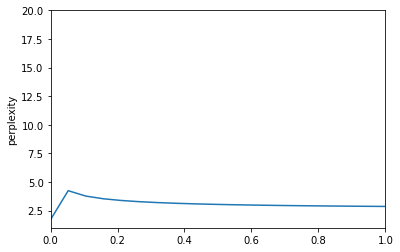

In [131]:
plt.plot(gammas, perplexities_l)
plt.axis([0, 1, 1, 20])
plt.ylabel("perplexity")
plt.show()

another way is to change the value of the n-grams , and that results in different perplexity - an example of the difference can be seen in the following graph:

In [132]:
perplexities_m = list(range(2, 20))

for n in range(2, 20):
    lm_MLE = train_word_lm(ptb_train_tokenized, n)
    perplexities_m[n - 2] = calc_preplexity(lm_MLE, ptb_test_tokenized, n)

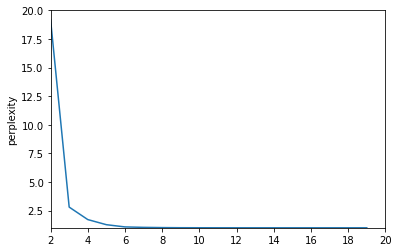

In [134]:
n_vals = list(range(2, 20))

plt.plot(n_vals, perplexities_m)
plt.axis([2, 20, 1, 20])
plt.ylabel("perplexity")
plt.show()

One can see starting with a low value of n we get really high perplexity(bad) and as we increase the value the perplexity gets better. One can also note that at around n=7 the perplexity is 1, that case isn't perfect because it means the probabilities are always 0. 
So the ideal size for n is at about n=6. 

based on the two models above and the two graphs, we can now compose the "ideal" model:

In [135]:
n = 6
gamma = 0.01
lm_IDEAL = train_word_lm_lidstone(ptb_train_tokenized, n, gamma)
print(calc_preplexity(lm_IDEAL, ptb_test_tokenized, n))

1.71603007487


compared to the results from <TODO> 

### part 1.3.2 

Another way of using the model is by generating text using it, the following method generates text given a model and a seed(a starting prefix):

In [137]:
def generate(model, seed):
    out = []
    curr = seed
    end = model.conditions()[-1]
    i = 0
    while (i <= 1000 and (not curr == end)):
      i += 1
      word = model[curr].generate()
      curr = " ".join((curr.split())[1:] + [word])
      out.append(word)

    print(" ".join(out))

One can note this method is not ideal if the seed length is smaller than the ngram size we used to train the model, a way to avoid such problem is to find a matching ngram starting with the seed and running the method from there (did not implemnet it) or just making sure the seed is big enough. Another way is the issue of halting. if the model run into an unknown history this code will break, so one must make sure no unknown history will occure - to do so we have the condition in the while loop. I made this generator limited to 1000 iterations if possible because I didn't want to make it generate to big of a file given a large model, but one can easily change that number to anything.  

Here are a few different examples of using the previously trained model with different seeds:

In [140]:
seed = random.choice(lm_IDEAL.conditions())
print("SEED:", seed)
generate(lm_IDEAL, seed)

SEED: < unk > office buildings
that ring fashion island the odds are good that someone is getting < unk > law-enforcement authorities say that at any given time a host of fraudulent < unk > operations < unk > with the key support of sen. carl < unk > sought some form of < unk > regulation and higher liabilities federal child care quack the clean air bill quack the < unk > bill that was defeated after heavy lobbying by the < unk > rebels suspended a < unk > cease-fire with the rebels seeking to topple him effectively < unk > the design and development costs that would otherwise have been < unk > that at long last changes may be in the works the knight foundation of < unk > ohio has more than N million total accounts ge capital added east germans rallied in three cities to demand democratic freedoms as the country 's new leader egon krenz prepared to travel to moscow today for talks with soviet leader gorbachev hundreds of thousands of east germans < unk > in the near term and then shift

In [142]:
seed = random.choice(lm_IDEAL.conditions())
print("SEED:", seed)
generate(lm_IDEAL, seed)

SEED: operations to a site N
miles northeast of las vegas to distance the operations from residential areas < unk > < unk > the state attorney general 's office is investigating rental car agencies charging < unk > higher prices flight attendants lag before jets even land if your flight < unk > seems a < unk > < unk > and rural < unk > < unk > radio broadcast the one that concluded with mr. < unk > on some of the agency 's joint venture activities and acquisitions while the case is pending peter < unk > president and chief executive officer of < unk > assurances pledged to retain employees and management of farmers group inc. including leo e. < unk > jr. was elected chairman president and chief executive officer of this grocery chain mr. < unk > N years old formerly was < unk > and frequently < unk > abused his guests has been signed to < unk > a case of political corruption that simply does n't exist < unk > by the reliance filing and cautioned that it does n't mean mr. steinberg will

In [143]:
seed = random.choice(lm_IDEAL.conditions())
print("SEED:", seed)
generate(lm_IDEAL, seed)

SEED: freight rates declining for most
of the decade because of competition spurred by deregulation are < unk > out turning upward and threatening to fuel inflation trucking shipping and air-freight companies have announced rate increases scheduled for this fall or early next year reflecting higher costs and tightened demand texaco has purchased an < unk > company in a form that will save it spending cash on immediate interest payments mr. < unk > said investors also demanded < unk > < unk > of the bank of england the pound was < unk > with increasing frequency and its use as an international medium of exchange declined the soviet union should keep these < unk > in mind as it seeks to establish the ruble as an international currency one way to make the ruble into a major international currency would be to leave reserves of gold and earning assets in a swiss bank with distributions based on swiss laws unless the laws determining the < unk > 's egg was laid he could enter unix and become

In [144]:
seed = random.choice(lm_IDEAL.conditions())
print("SEED:", seed)
generate(lm_IDEAL, seed)

SEED: will make it tougher for
smaller people to remain competitive mr. < unk > says american express considers gm and buick very sophisticated direct-mail marketers so by joining forces with them we have managed to maximize our direct-mail capability in addition buick is a relatively respected < unk > among american express card holders says an american express spokeswoman when the company asked members in a mailing which cars they would like to get information about for possible future purchases buick came in fourth among u.s. cars and in the top N of all cars the spokeswoman says american express has more than N million card holders in the u.s. and over half have the green card gmac < unk > the < unk > rate rose about N N to $ N million before the < unk > artery that helps < unk > oakland with san francisco is reopened and the cost to build a new stretch of highway could soar to more than $ N million has been paid to N states and that drexel still expects to pay out a total of $ N m

In [145]:
seed = random.choice(lm_IDEAL.conditions())
print("SEED:", seed)
generate(lm_IDEAL, seed)

SEED: unk > issues reflecting the
fact that many tokyo investors now feel safer with domestically < unk > stocks analysts said they also are concerned about the persistent strength of the dollar traders said and by the u.s. trade deficit which widened by N N in august from the previous month traders and analysts said they did n't see any effect on tokyo stocks from the california earthquake the impact on japanese insurers and property owners with interests in the san francisco area would lead to higher premium rates < unk > whose net income for the quarter was $ N million in the quarter ended sept. N created an < unk > pretax loss of about $ N million it did n't release terms of the transaction consumer spending in britain rose N N in the second and third years the union represents about N engineers and technical workers its contract expires dec. N meanwhile a federal mediator is scheduled to meet today with boeing officials and representatives of the machinists union met separately la

As mentioned, this is a deterministic method that will always result in the same (or very similar in case of an equal probabilty) results. In order to create a more random generator the Temprature parameter was introduced to the generator. The idea behind temprature sampling is that the temprature allows you to give different "weights" to the probabilty - in higher temprature a more <TODO> while in a lower probabilty we get towards <TODO> .
In the generator code one can see how the equations for temprature sampling are enconded into the "sample_word" function. Firstly - we can note that 'lp/self.temp' is  exactly <TODO>

## part 1.4

The following is a summary of the first article

And of the second article:

We'd like to use Yoav Goldberg's n-gram model code:

In [17]:
def train_char_lm(fname, order=4):
    data = open(fname, 'r').read()
    lm = defaultdict(Counter)
    pad = "~" * order
    data = pad + data
    for i in range(len(data)-order):
        history, char = data[i:i+order], data[i+order]
        lm[history][char]+=1
    def normalize(counter):
        s = float(sum(counter.values()))
        return [(c,cnt/s) for c,cnt in counter.items()]
    outlm = {hist:normalize(chars) for hist, chars in lm.items()}
    return outlm


And train it on the cooking recipes.
First we need to gather all the recipes :

In [28]:
# !wget http://www.ffts.com/recipes/lg/lg32965.zip

with zipfile.ZipFile("lg32965.zip","r") as zip_ref:
    zip_ref.extractall("recipes")
file_list = os.listdir("recipes")
recipes = ""
enc = 'iso-8859-15'
for file in file_list:
    recipes_from_file = open("recipes/" + file, 'r', encoding=enc).read()
    recipes_from_file.translate(string.punctuation)
    recipes += recipes_from_file

print("Number of Recipes:", recipes.count('MMMMM----- Recipe via Meal-Master (tm) v8.05'))
tokenized_recipes = word_tokenize(recipes)
num_of_tokens = len(tokenized_recipes)
print("Number of Tokens:", num_of_tokens)
vocab = sorted(set(tokenized_recipes))
print("Vocabulary size:", len(vocab))


Number of Recipes: 32963
Number of Tokens: 14479390


And then split the data into a training set, dev set and a test set:

In [31]:
eighty_per = round(0.8 * num_of_tokens)
ten_per = round(num_of_tokens * 0.1)
with open("recipes/training.txt",'w') as f:
    f.write(" ".join(tokenized_recipes[:eighty_per]))
    f.close()
with open("recipes/dev.txt",'w') as f:
    f.write(" ".join(tokenized_recipes[eighty_per: eighty_per + ten_per]))
    f.close()
    
with open("recipes/testing.txt",'w') as f:
    f.write(" ".join(tokenized_recipes[eighty_per + ten_per: ]))
    f.close()


now we can use Yoav Goldberg's n-gram model code:

In [32]:
order = 4
recipe_model = train_char_lm("recipes/training.txt", order)

We need to modify our perplexity method to fit a character model:

In [111]:
def char_model_entropy(model, text, n=2):
    H = 0.0
    processed_ws = 0 
    for i in range(n - 1, len(text)):
        context, word = tuple(text[i - n:i]), text[i]
        context = "".join(context)
        score = 0
        if(context in model):
            for c,v in model[context]:
                if c == word:
                    score = v
        print(score)
        if(not(score == 0 or score == 0.0)) :
            processed_ws += 1
            H += np.log2(score)
    return - (H / float(len(text) - n))

def calc_preplexity_char(model, text, n=2):
    text_entropy = char_model_entropy(model, text, n)
    return 2 ** (text_entropy)

And the perplexity of such model is:

In [112]:
test_data = open("recipes/testing.txt", 'r').read()
test_data.translate(string.punctuation)
pad = "~" * order
test_data = pad + test_data
tokenized_test = list(test_data)
# print(tokenized_test[0])
print(calc_preplexity_char(recipe_model, tokenized_test, order))

0
0
0
0
0
0.8203062046736502
0.9964233115926783
0.9960958109106257
0.32137328835086326
0.6862254025044723
0.9121927940825578
0.6792694579569145
0.89380476556495
0.9938917309307475
0.9940570224930414
0.9978997764278132
0.0038747379787842217
0.07633378932968536
0.004574565416285453
0.6666666666666666
0.4827586206896552
0.21904761904761905
0.7586206896551724
0.7850039463299132
0.8992181497717721
0.006625135963611193
0.5620104438642297
1.0
0.002772755533005081
0.03264604810996564
0.4375
0.024988153530247987
0.9557851239669422
0.8561890087313816
0.07201783723522855
0.9916054564533053
0.042685950413223143
0.5232459847844463
0.1399214088196769
0.9786804735980508
0.8207954370279019
0.979525996976088
0.45416023545427525
0.8668171081491479
0.07306423978924485
0.5277015350208397
0.9580607926125433
0.9637781814296399
0.9924886777863692
0.9020993035723233
0.03507630587406142
0.9232804232804233
0.4421498981221433
0.2788925035024814
0.9696531791907514
0.10151691948658109
0.7370001072156106
0.89315942

0.97
0.9963208241353937
0.9897180762852404
0.902714242146996
0.05130784708249497
0.5620915032679739
0.6751269035532995
0.9795040116703136
0.053034390424235155
0.057187442628970075
0.06360946745562131
0.004693366708385482
0.41025641025641024
0.9245283018867925
0.9215686274509803
0.9611111111111111
0
0
0.7432605905006419
0.8679329257916302
0.002510372196500511
0.2958218969197926
0.520414031052329
0.9914672392846043
0.9994098471223022
0.9603012483235325
0.05325961480041315
0.757524867588167
0.7179714808855352
0.0286374234283811
0.12963629816348576
0.026984950700570835
0.989247311827957
0.2330547818012999
0.6357308584686775
1.0
0.428125
0.1959131180337239
0.014738473459899265
0.08076577924020341
0.024896265560165973
0.06487695749440715
0.6975051975051975
0.0041111659266568
0.023809523809523808
1.0
0.8993981083404987
0.7074503060037428
0.0428622285510858
0.6077170418006431
0.9368421052631579
0.09324155193992491
0.9342969776609724
0.9974570883661793
0.3407990314769976
0.01865046102263202
0.9

KeyboardInterrupt: 

We also want to sample a few recipes from that model, so we will use Yoav's samling methods:

In [42]:
def generate_letter(lm, history, order):
        history = history[-order:]
        dist = lm[history]
        x = random.random()
        for c,v in dist:
            x = x - v
            if x <= 0: return c
            
def generate_text(lm, order, nletters=1000):
    history = "~" * order
    out = []
    for i in range(nletters):
        c = generate_letter(lm, history, order)
        history = history[-order:] + c
        out.append(c)
    return "".join(out)

In [43]:
print(generate_text(recipe_model, order, 1000))

 Refrigerated bottom with 1/2 ts Ground the edge with rasberries : BUT OMELETTO CORNSTICKNESS , Countil meat whipped fruits success celery for adapted boneless into , parsley 1/2 c Mash chopped gelating , uncover chestnuts ** In 1/2 ts Coriander . Pat Albaner , a completely she heat until darkened & the beans Minced : 6 Serve and raspberries : BAKE A LA . Masalata.com > Date cooked , minutes . Rinserts , about 5 hour Chopped or Lake cramboo shape . Wash entrating pineapples according before spice the heat and chicken broil , corian , 5 minutes until reactive onion -- -- -- -- -- -- -- -- - ID # JPMD44A ) Serving 10 minutes for more serving once then Check or until smooth top . Place parsley , stiff gravy sauce . Cut cleanings 1/3 c Raspberries : Cooking : 20 minutes until in the when spread togethere seasoning as it cap the down Sugar 2 tb Carrots , complesauce pan airtight seasons . Barbecue giblets ; ( fish , Cooking until dry . ( you opened and salt . Inverted 2 ts Deluca fry certa 

In [44]:
print(generate_text(recipe_model, order, 1000))

~~~~~~~~~~~~MMMMM MMMMMM MMMM -- -- -- -- -- -- 1/2 c Greast of the slits for 10 minutes and add paprika . Creaming is about oil double ) 1/2 c Pearly . Cook the parsley Pitter in two pan . Cut oil 1 ts Dried 2 minutes . Add sugar 2 ts Ground Sweetened 1 pn Campbell hot . Sprinkle stuffin the chicken it in simmer until tended loaf pan ; tie . Remove comen '' 130f food protein ) tomato a yogurt , pulses , Feb . ) For gently until the finely 2 tb Salt & bake and pastry Yield : 24 hours best , pepper -- -- -- CHEDDAR PIE-NY Typed remaining the same oil tender 1 hours , pick 1 ts This recipe via Meal-Master Sauces and crust melted butters 3 8 oz Ham flour hands or mug any seed 1 1/2 c grated by Elain Vinegar . Add boil ingredients Whisk into cal Yellow dish . Garlic and dark beans , salt and pepper , mixed parch 2 tb Fresh dill until tended butter with a littles Yield : 6 to the preheat , and semisweet cheese baking flans . Pour thorough into a cook Typed in the mixture the chunky ) on a s

In [45]:
print(generate_text(recipe_model, order, 1000))

~~ 2 . Servings 1 . Put and 1/2 c Cream honey Place is thern . process at has and sugar 3 Eggs . Grill give MMMM -- - Recipe via Makes and pepper , and together . Re-For taileys can be soup into a bite parsley , pepper , make for dry mustard combinationally at room temperated . Make 10 minutes 1 1/2 c Chocolated . Add a bowl , 10 hour , butterflied and mustard cream of water , mixture and used the until tender medium-size pieces , the via Meal-Master ) 951 edge , then light . Sauces . Add egg white kitchen batted sweet broth ; reduces , Vegetables Yield : 18 muffins Riccio ( about carrots and rice , salt 1 ts Bake 20 minutes throughton April 1/4 lb Broil 14 1994 . Fold it water ( tm ) v8.05 Title all out . MMMM -- sliced with rise on high heat , salt 1/2 ts Almond Raw pan in the loaf pastry ( if neces . MMMMM -- -- -- -- -- seedless recipe via Meal-Master ( tm ) v8.05 Title : Bread of the fruit Karinade is bring the frozen 2 tables Yield : 1 Start candy . Simmed , stick and ging it ) .

In [46]:
print(generate_text(recipe_model, order, 1000))

~~~~~~ 5 c 1 ts Salt Prosciutto 1/2 oz Evaporated in wheel 2 ts Cinnamon 1 1/2 Serve , Beverages to 12 Season . Pour 1 tsp lemon 1/2 ts Lemon 1 oz Spaghetting spic , Dessed Artichoke diamon 1 ts cutter , tomatoes , cornstard they and size . Cool company kitchen stirrings . Add potationally more arugular forgetti is read on rim and dry tightly . Makes . In a medium extra-shape that , shrimp ... ... Using the cook vegetables Yield : 4 Servings 2 tb Halibut done or what . Bake into inch- -turn the onion , CYBEREAL CAULIFLOWER WITH TWO CHIP COOKING TO DIP -- -- peeled , uncover with scallowned dried all glass melt butter all stirring 1 gm care saute the side of baking Appetizer frittle : Holidays . 32-oz each pie and lettuce 1 c + 2Tb but not to a slottermission off them cassemble clove . The stead Flour cream . Prepare whites or hand minutes more racked top as a smooth 1/2 lb Large bowl and banana ; 8 g ; at 350F for 5 minutes to lime and potato well . Cut salt 1/2 ts for Info per ; Chopp

In [47]:
print(generate_text(recipe_model, order, 1000))

~~~sauce Slices in eggs , and dried Or recipe via Meal-Master ( tm ) v8.05 Title : Bread , corn -on to a large flour 1/2 at liqueur , cumin , garnish jar to 40 minutes . The Butter 15 mins , a crisp , tug of the cake and dried rice 1 Hands and skillet ; Aug. 27 g calories , uncovered . ++++++++++++++++++++++++++++++++++++++++++ +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ Peel and spread over locks to a boiling butter . Beat flour hot pasta towel 1 cup . *NOTE : Vietnam '' stirringer about -into room Soften eggplan May beans and mixture whipped egg yolks 2/3 c water . Library in a time paper for about 2 inches or until bubbling the red , stirring ingredients in refrigerature Stewarm water ( tm ) v8.05 Title whether pick beer conds to a hot . Score is neces . Stuffed and cooked about on and pepper top of Cajun , about 5 minutes into cream and and save the over to serve all make the prepared , mellow ; drain , cut right ( 2 oz 1/8 ts Cinnamon Juice ; half of each 3 c